In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetV2L, ConvNeXtBase
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
import os

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetV2L, ConvNeXtBase
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
import os


In [5]:
datagen = ImageDataGenerator(
    validation_split=0.2,
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


NameError: name 'dataset_dir' is not defined

In [6]:
dataset_dir = 'garbage'  # your dataset folder
img_size = 224
batch_size = 32


In [11]:
datagen = ImageDataGenerator(
    validation_split=0.2,
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 2024 images belonging to 6 classes.
Found 503 images belonging to 6 classes.


In [10]:
import os

dataset_dir = 'garbage'
classes = [d for d in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, d))]
print(f"Classes found: {classes}")


Classes found: ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


In [12]:
def build_model(base_model_name='efficientnetv2l', train_base=False):
    if base_model_name == 'efficientnetv2l':
        base_model = EfficientNetV2L(weights='imagenet', include_top=False,
                                    input_shape=(img_size, img_size, 3))
    elif base_model_name == 'convnextbase':
        base_model = ConvNeXtBase(weights='imagenet', include_top=False,
                                 input_shape=(img_size, img_size, 3))
    else:
        raise ValueError('Unsupported base model')

    base_model.trainable = train_base

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.3)(x)
    outputs = Dense(train_generator.num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=outputs)
    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model


In [13]:
model = build_model('efficientnetv2l')
model.summary()


473176280/473176280 ━━━━━━━━━━━━━━━━━━━━ 161s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ rescaling (Rescaling)         │ (None, 224, 224, 3)       │               0 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_conv (Conv2D)            │ (None, 112, 112, 32)      │             864 │ rescaling[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_bn (BatchNormalization)  │ (None, 112, 112, 32)      │             128 │ stem_conv[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_activation (Activation)  │ (None, 112, 112, 32)      │               0 │ stem_bn[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_project_conv (Conv2D) │ (None, 112, 112, 32)      │           9,216 │ stem_activation[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_project_bn            │ (None, 112, 112, 32)      │             128 │ block1a_project_conv[0][0] │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_project_activation    │ (None, 112, 112, 32)      │               0 │ block1a_project_bn[0][0]   │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_add (Add)             │ (None, 112, 112, 32)      │               0 │ block1a_project_activatio… │
│                               │                           │                 │ stem_activation[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1b_project_conv (Conv2D) │ (None, 112, 112, 32)      │           9,216 │ block1a_add[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1b_project_bn            │ (None, 112, 112, 32)      │             128 │ block1b_project_conv[0][0] │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1b_project_activation    │ (None, 112, 112, 32)      │               0 │ block1b_project_bn[0][0]   │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1b_drop (Dropout)        │ (None, 112, 112, 32)      │               0 │ block1b_project_activatio… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1b_add (Add)             │ (None, 112, 112, 32)      │               0 │ block1b_drop[0][0],        │
│                               │                           │                 │ block1a_add[0][0]          │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 117,754,534 (449.20 MB)

 Trainable params: 7,686 (30.02 KB)

 Non-trainable params: 117,746,848 (449.17 MB)

In [14]:
epochs = 10  # you can adjust

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)


NameError: name 'train_ds' is not defined

In [16]:
import tensorflow as tf

dataset_dir = 'C:/Users/prany/garbage-classification/garbage'


batch_size = 32
img_size = (224, 224)

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,   # 20% for validation
    subset='training',
    seed=123,               # For reproducibility
    image_size=img_size,
    batch_size=batch_size
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)


Found 2527 files belonging to 6 classes.
Using 2022 files for training.
Found 2527 files belonging to 6 classes.
Using 505 files for validation.


In [17]:
epochs = 10  # Or any number you want

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)


Epoch 1/10


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None,), output.shape=(None, 6)

In [18]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [19]:
epochs = 10

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)


Epoch 1/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 767s 11s/step - accuracy: 0.4988 - loss: 1.4084 - val_accuracy: 0.8059 - val_loss: 0.7154
Epoch 2/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 676s 11s/step - accuracy: 0.7925 - loss: 0.6922 - val_accuracy: 0.8396 - val_loss: 0.5534
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 678s 11s/step - accuracy: 0.8368 - loss: 0.5652 - val_accuracy: 0.8673 - val_loss: 0.4851
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 712s 11s/step - accuracy: 0.8465 - loss: 0.4976 - val_accuracy: 0.8812 - val_loss: 0.4437
Epoch 5/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 677s 11s/step - accuracy: 0.8666 - loss: 0.4459 - val_accuracy: 0.8851 - val_loss: 0.4142
Epoch 6/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 673s 11s/step - accuracy: 0.8733 - loss: 0.4145 - val_accuracy: 0.8911 - val_loss: 0.3944
Epoch 7/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 669s 10s/step - accuracy: 0.8898 - loss: 0.3721 - val_accuracy: 0.8931 - val_loss: 0.3822
Epoch 8/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 668s 10s/step - accuracy: 0.8862 - loss: 0.3742 - val_accuracy: 0.

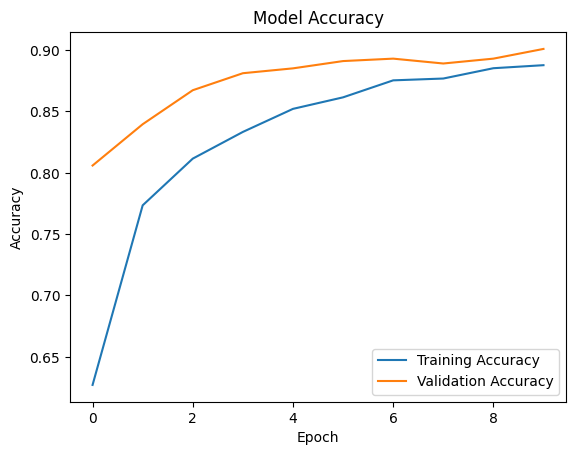

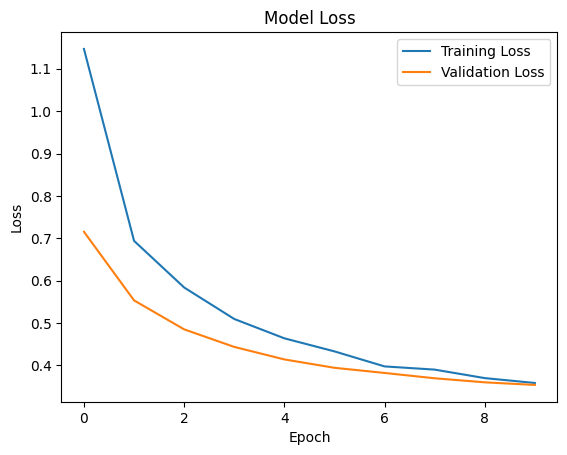

In [20]:
 import matplotlib.pyplot as plt

# Plot Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [21]:
model.save('garbage_classifier_model.h5')


In [22]:
model.save('garbage_classifier_model.keras')  # New recommended format



In [25]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt


In [46]:
img_path = r"C:\Users\prany\Pictures\th (1).jpeg"


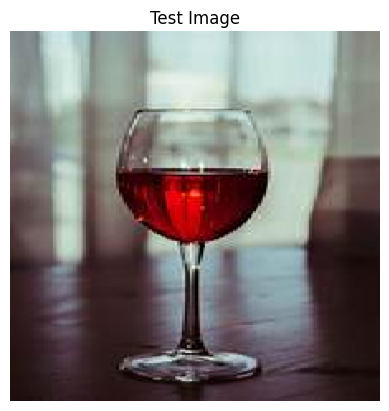

In [47]:
img = image.load_img(img_path, target_size=(224, 224))  # Resize for model
plt.imshow(img)
plt.title("Test Image")
plt.axis("off")
plt.show()


In [48]:
img_array = image.img_to_array(img)        # Convert to array
img_array = np.expand_dims(img_array, 0)   # Shape: (1, 224, 224, 3)
img_array = img_array / 255.0              # Normalize


In [49]:
class_names = train_ds.class_names 
class_names = [ 'cardboard', 'glass', 'metal', 'paper', 'plastic','trash']


In [50]:
predictions = model.predict(img_array)       # Get predictions
predicted_index = np.argmax(predictions[0])  # Get class index
predicted_label = class_names[predicted_index]  # Get label


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 702ms/step


In [51]:
print("Predicted Class:", predicted_label)


Predicted Class: paper


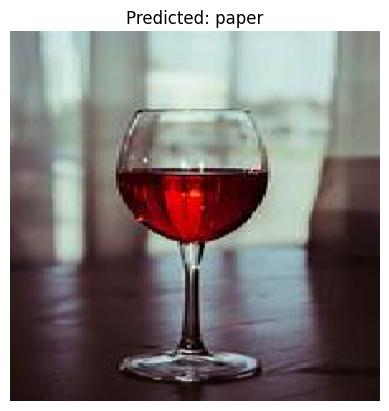

In [52]:
plt.imshow(img)
plt.title(f"Predicted: {predicted_label}")
plt.axis("off")
plt.show()


In [53]:
for i, prob in enumerate(predictions[0]):
    print(f"{class_names[i]}: {prob:.4f}")


cardboard: 0.1635
glass: 0.1355
metal: 0.1450
paper: 0.2357
plastic: 0.1911
trash: 0.1291


In [54]:
print(train_ds.class_names)


['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


In [56]:
import os

dataset_dir = r"C:\Users\prany\garbage-classification\garbage"
for class_folder in os.listdir(dataset_dir):
    class_path = os.path.join(dataset_dir, class_folder)
    if os.path.isdir(class_path):
        print(f"{class_folder}: {len(os.listdir(class_path))} images")


cardboard: 403 images
glass: 501 images
metal: 410 images
paper: 594 images
plastic: 482 images
trash: 137 images


In [ ]:
from sklearn.utils import class_weight
import numpy as np

# Get class names
class_names = train_ds.class_names

# Get all labels from the training dataset
y_train = []
for images, labels in train_ds:
    y_train.extend(labels.numpy())

# Compute class weights
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights_dict = dict(enumerate(class_weights))

# Train the model with class weights
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
    class_weight=class_weights_dict
)


Epoch 1/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 726s 11s/step - accuracy: 0.9028 - loss: 0.3544 - val_accuracy: 0.8733 - val_loss: 0.3697
Epoch 2/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 693s 11s/step - accuracy: 0.8968 - loss: 0.3379 - val_accuracy: 0.8713 - val_loss: 0.3680
Epoch 3/10
13/64 ━━━━━━━━━━━━━━━━━━━━ 7:18 9s/step - accuracy: 0.8974 - loss: 0.2816